In [1]:
import cv2 as cv
import numpy as np
import os
import time
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>"
    + "#notebook { padding-top:0px !important; } " 
    + ".container { width:100% !important; } "
    + ".end_space { min-height:0px !important; } "
    + "</style>"))

In [2]:
vid_path = os.environ['USERPROFILE'] + '/Videos/jellyfish-120-mbps-4k-uhd-h264.mkv'

In [3]:
cap = cv.cudacodec.createVideoReader(vid_path)

In [4]:
_,cuFrame = cap.nextFrame()

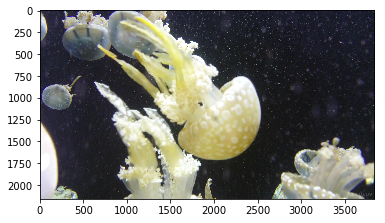

In [5]:
plt.imshow(cv.cuda.cvtColor(cuFrame,cv.COLOR_BGRA2RGBA).download());

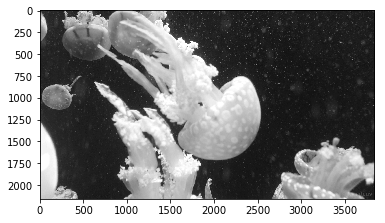

In [6]:
cuSrc = cv.cuda.cvtColor(cuFrame,cv.COLOR_BGRA2GRAY)
plt.imshow(cuSrc.download(),cmap='gray', vmin=0, vmax=255);

In [7]:
cuSrc32F = cv.cuda_GpuMat(cuSrc.size(),cv.CV_32FC1)
cuSrc.convertTo(cv.CV_32FC1,cuSrc32F)
cuSrc32F.size(),cuSrc32F.channels(),cuSrc32F.type()==cv.CV_32FC1

((3840, 2160), 1, True)

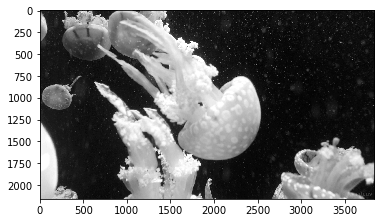

In [8]:
plt.imshow(cuSrc32F.download(),cmap='gray');

In [9]:
kernel = (np.random.random((3, 3)) * 1).astype(np.float32)
conv = cv.cuda.createConvolution()
cuKernel= cv.cuda_GpuMat(kernel)
cuDst = conv.convolve(cuSrc32F, cuKernel);

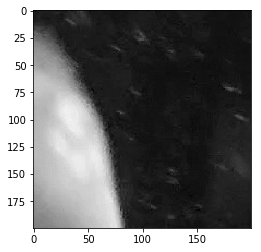

In [10]:
plt.imshow(cuSrc32F.download()[:200,:200],cmap='gray');

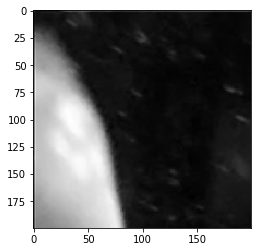

In [11]:
plt.imshow(cuDst.download()[:200,:200],cmap='gray');